In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [17]:
train_df = pd.read_csv('../input/plant-pathology-2020-fgvc7/train.csv')
test_df = pd.read_csv('../input/plant-pathology-2020-fgvc7/test.csv')

In [18]:
train_df['label'] = train_df.apply(lambda x: np.argmax(x[1:]),axis=1)

In [19]:
from PIL import Image
img = Image.open('../input/plant-pathology-2020-fgvc7/images/Train_0.jpg')
nparr  = np.asarray(img)

In [20]:
nparr.shape

(1365, 2048, 3)

In [21]:
import os
label_encode = {0:"healthy",1:"multiple_diseases",2:"rust",3:"scab"}

In [22]:
from sklearn.model_selection import train_test_split

train_df,validate_df = train_test_split(train_df,test_size=0.2)

In [23]:
new_img_size = (224,224)

In [24]:
img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{train_df.iloc[0]["image_id"]}.jpg')
img=img.resize(new_img_size)
images_train = np.array([np.asarray(img)])

for i in range(1,train_df.shape[0]):
    img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{train_df.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_train = np.concatenate((images_train,np.array([np.asarray(img)])),axis=0)

In [25]:
img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{validate_df.iloc[0]["image_id"]}.jpg')
img=img.resize(new_img_size)
images_validate = np.array([np.asarray(img)])
for i in range(1,validate_df.shape[0]):
    img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{validate_df.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_validate = np.concatenate((images_validate,np.array([np.asarray(img)])),axis=0)


In [26]:
img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{test_df.iloc[0]["image_id"]}.jpg')
img=img.resize(new_img_size)
images_test = np.array([np.asarray(img)])
for i in range(1,test_df.shape[0]):
    img = Image.open(f'../input/plant-pathology-2020-fgvc7/images/{test_df.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_test = np.concatenate((images_test,np.array([np.asarray(img)])),axis=0)

In [27]:
print("Training set is of shape : ",images_train.shape)
print("Validation set is of shape : ",images_validate.shape)
print("Test set is of shape : ",images_test.shape)

Training set is of shape :  (1456, 224, 224, 3)
Validation set is of shape :  (365, 224, 224, 3)
Test set is of shape :  (1821, 224, 224, 3)


In [28]:
model = Sequential([
    layers.Rescaling(1./255.,input_shape=(224,224,3)),
    layers.Conv2D(8,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax'),   
])
model.build()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [30]:
batch_size = 32
epochs = 15

model.fit(
    images_train,
    train_df['label'],
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(images_validate,validate_df['label'])
)

Epoch 1/15


2024-05-22 15:48:40.693404: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98575: 6.65619, expected 5.80647
2024-05-22 15:48:40.693458: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98577: 7.43588, expected 6.58615
2024-05-22 15:48:40.693468: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98578: 6.98717, expected 6.13745
2024-05-22 15:48:40.693484: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98579: 5.38501, expected 4.53529
2024-05-22 15:48:40.693493: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98580: 6.87164, expected 6.02192
2024-05-22 15:48:40.693500: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98596: 6.93394, expected 6.08422
2024-05-22 15:48:40.693508: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98599: 7.27616, expected 6.42644
2024-05-22 15:48:40.693516:

13/46 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2670 - loss: 2.2717

I0000 00:00:1716392925.688872     250 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/46 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3062 - loss: 1.7821

2024-05-22 15:48:48.121861: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.63267, expected 4.8307
2024-05-22 15:48:48.121931: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 6.6932, expected 5.89123
2024-05-22 15:48:48.121940: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 28: 6.96889, expected 6.16692
2024-05-22 15:48:48.121948: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 62: 6.44122, expected 5.63926
2024-05-22 15:48:48.121956: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 6.67011, expected 5.86814
2024-05-22 15:48:48.121963: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 66: 5.72875, expected 4.92678
2024-05-22 15:48:48.121972: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 68: 6.56736, expected 5.76539
2024-05-22 15:48:48.121979: E external/local_xla/x

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.3083 - loss: 1.7515

2024-05-22 15:48:57.892957: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.08645, expected 3.52211
2024-05-22 15:48:57.893020: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148282: 4.58285, expected 4.01851
2024-05-22 15:48:57.893031: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148494: 4.61552, expected 4.05118
2024-05-22 15:48:57.893039: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148683: 4.60142, expected 4.03708
2024-05-22 15:48:57.893049: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149131: 4.60291, expected 4.03856
2024-05-22 15:48:57.893057: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149193: 4.28026, expected 3.71592
2024-05-22 15:48:57.893066: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149316: 4.3868, expected 3.82246
2024-05-22 15:48:57.8

46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.3088 - loss: 1.7446 - val_accuracy: 0.1205 - val_loss: 2.4362
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3921 - loss: 1.2254 - val_accuracy: 0.3562 - val_loss: 1.3231
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4372 - loss: 1.2098 - val_accuracy: 0.3425 - val_loss: 1.3939
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4447 - loss: 1.1806 - val_accuracy: 0.4164 - val_loss: 1.2684
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5338 - loss: 1.0918 - val_accuracy: 0.5151 - val_loss: 1.1897
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6049 - loss: 0.9998 - val_accuracy: 0.5315 - val_loss: 1.1502
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6132 - loss: 0.9328 - val_accuracy: 0.5370 - val_loss: 1.1380
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6712 - loss: 0.8279 - val_accuracy: 0.5973 - val_loss: 

In [31]:
data_augmentaion = Sequential([
    layers.RandomRotation(factor=(-0.2,0.2),seed = 123),
    layers.RandomZoom(0.1),
])

In [32]:
model = Sequential([
    layers.Rescaling(1./255.,input_shape=(224,224,3)),
    data_augmentaion,
    layers.Conv2D(8,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax'),   
])
model.build()

In [33]:
batch_size = 32
epochs = 50

model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    images_train,
    train_df['label'],
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(images_validate,validate_df['label'])
)

Epoch 1/50


2024-05-22 15:51:39.924581: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_3_1/dropout_3_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.3151 - loss: 2.0595 - val_accuracy: 0.3397 - val_loss: 1.2987
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3557 - loss: 1.2500 - val_accuracy: 0.3425 - val_loss: 1.3059
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3414 - loss: 1.2392 - val_accuracy: 0.3397 - val_loss: 1.2743
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3491 - loss: 1.2175 - val_accuracy: 0.3808 - val_loss: 1.3044
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3544 - loss: 1.2358 - val_accuracy: 0.3479 - val_loss: 1.2801
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3979 - loss: 1.2075 - val_accuracy: 0.3671 - val_loss: 1.2748
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4139 - loss: 1.2007 - val_accuracy: 0.3836 - val_loss: 1.2586
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4144 - loss: 1.1841 - val_accuracy: 0.3753 - val_loss: 1.

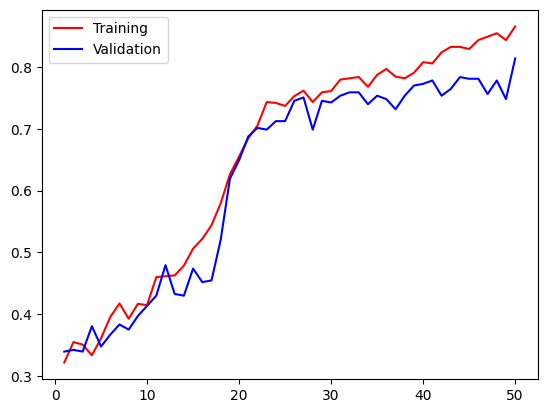

In [34]:
train_acc = history.history['accuracy']
validate_acc = history.history['val_accuracy']
epoch_ = range(1,epochs+1)

plt.plot(epoch_,train_acc,'r',label='Training')
plt.plot(epoch_,validate_acc,'b',label='Validation')
plt.legend()
plt.show()

In [36]:
predictions = model.predict(images_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [37]:
predictions_df = pd.DataFrame(np.round(predictions,2))
submission_df = pd.concat([test_df,predictions_df],axis=1)

In [38]:
submission_df.head()

,image_id,0,1,2,3
0,Test_0,0.00,0.01,0.99,0.00
1,Test_1,0.00,0.01,0.99,0.00
2,Test_2,0.22,0.02,0.00,0.76
3,Test_3,0.82,0.00,0.00,0.17
4,Test_4,0.00,0.00,1.00,0.00


In [39]:
submission_df.rename(columns={k:label_encode[k] for k in range(0,4)}).to_csv("submission.csv",index=False)